# Import Prerequisites

In [1]:
# import prerequisites
import speech_recognition as sr
from selenium_web import *
from youtube import *
from read_news import *
import randfacts
from tell_joke import *
from weather import *
import datetime
import noisereduce as nr
import numpy as np
import matplotlib.pyplot as plt
import wave

In [2]:
from gtts import gTTS
import os
from playsound import playsound

# Function to convert text to speech
def speak(text):
    tts = gTTS(text=text, lang='en', slow=False)
    tts.save("output.mp3")
    playsound("output.mp3")

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


In [3]:
# Function to return a greeting based on the time of day
def wishme():
    hour = int(datetime.datetime.now().hour)
    if 0 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 16:
        return "Afternoon"
    else:
        return "Evening"

# Noise reduction and Speech recognition

In [4]:
def listen_command():
    with sr.Microphone(sample_rate=16000) as source:
        r = sr.Recognizer()
        print("Listening...")
        
        audio = r.listen(source)
        
        # Convert audio to numpy array for noise reduction
        audio_data = np.frombuffer(audio.get_raw_data(), dtype=np.int16)
        
        # Save original audio
        with wave.open("original_audio.wav", "wb") as f:
            f.setnchannels(1)
            f.setsampwidth(2)  # 2 bytes per sample for int16
            f.setframerate(16000)
            f.writeframes(audio_data.tobytes())

        # Apply noise reduction
        reduced_noise_audio = nr.reduce_noise(y=audio_data, sr=16000)
        
        # Save noise-reduced audio
        with wave.open("reduced_audio.wav", "wb") as f:
            f.setnchannels(1)
            f.setsampwidth(2)
            f.setframerate(16000)
            f.writeframes(reduced_noise_audio.tobytes())
        
        # Convert reduced audio back to AudioData format for recognizer
        reduced_audio_data = sr.AudioData(reduced_noise_audio.tobytes(), 16000, 2)

        plot_waveforms(audio_data, reduced_noise_audio)
        
        # Try recognizing text from the original audio
        try:
            text_original = r.recognize_google(audio, language="en-US")
            # print(f"Recognized Text (Original): {text_original}")
        except sr.UnknownValueError:
            text_original = "Could not recognize original audio"
            print(text_original)
        
        # Try recognizing text from the reduced audio
        try:
            text_reduced = r.recognize_google(reduced_audio_data, language="en-US")
            print(f"Recognized Text (Reduced): {text_reduced}")
            return text_reduced.lower()
        except sr.UnknownValueError:
            text_reduced = "Could not recognize reduced audio"
            print(text_reduced)
            speak(text_reduced)
            return None

# Plot waves for original_audio and reduced_audio 

In [5]:
def plot_waveforms(original_audio_data, reduced_audio_data, sample_rate=16000):
    # Create a time axis in seconds
    time_axis_original = np.linspace(0, len(original_audio_data) / sample_rate, num=len(original_audio_data))
    time_axis_reduced = np.linspace(0, len(reduced_audio_data) / sample_rate, num=len(reduced_audio_data))
    
    # Plot both waveforms
    plt.figure(figsize=(15, 6))
    
    # Original audio waveform
    plt.subplot(2, 1, 1)
    plt.plot(time_axis_original, original_audio_data, color='blue')
    plt.title("Original Audio Waveform")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    
    # Noise-reduced audio waveform
    plt.subplot(2, 1, 2)
    plt.plot(time_axis_reduced, reduced_audio_data, color='green')
    plt.title("Noise-Reduced Audio Waveform")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    
    plt.tight_layout()
    plt.show()
import io
# def plot_waveforms(original_audio_data, reduced_audio_data, sample_rate=16000):
#     # Create a time axis in seconds
#     time_axis_original = np.linspace(0, len(original_audio_data) / sample_rate, num=len(original_audio_data))
#     time_axis_reduced = np.linspace(0, len(reduced_audio_data) / sample_rate, num=len(reduced_audio_data))
    
#     # Plot both waveforms
#     plt.figure(figsize=(15, 6))
    
#     # Original audio waveform
#     plt.subplot(2, 1, 1)
#     plt.plot(time_axis_original, original_audio_data, color='blue')
#     plt.title("Original Audio Waveform")
#     plt.xlabel("Time (seconds)")
#     plt.ylabel("Amplitude")
    
#     # Noise-reduced audio waveform
#     plt.subplot(2, 1, 2)
#     plt.plot(time_axis_reduced, reduced_audio_data, color='green')
#     plt.title("Noise-Reduced Audio Waveform")
#     plt.xlabel("Time (seconds)")
#     plt.ylabel("Amplitude")
    
#     plt.tight_layout()

#     # Save the plot to a BytesIO stream
#     img_io = io.BytesIO()
#     plt.savefig(img_io, format='png')
#     img_io.seek(0)  # Move to the beginning of the stream
#     plt.close()  # Close the plot to free resources

#     return img_io


# Initiate Main Assistant System

ALSA lib pcm_dsnoop.c:618:(snd_pcm_dsnoop_open) unable to open slave
ALSA lib pcm_dmix.c:1052:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_dmix.c:1052:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm_dsnoop.c:618:(snd_pcm_dsnoop_open) unable to open slave
ALSA lib pcm_dmix.c:1052:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_dmix.c:1052:(snd_pcm_dmix_open) unable to open slave


Listening...


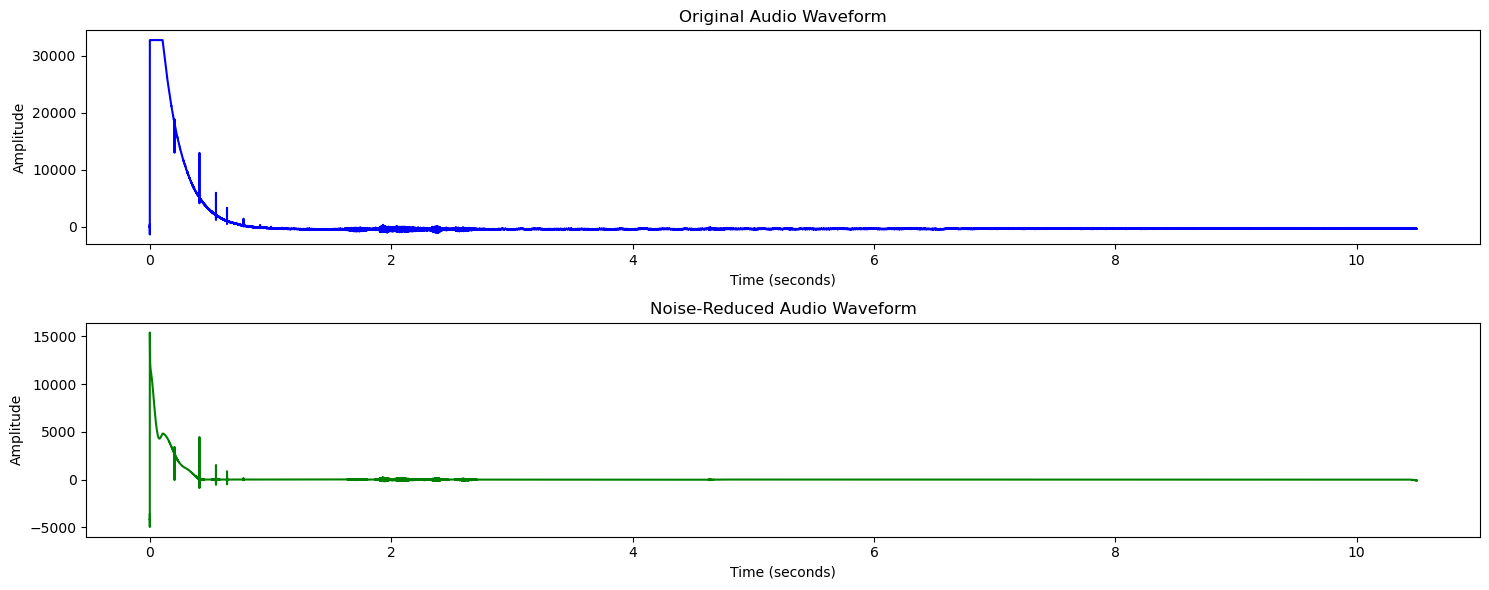

Recognized Text (Reduced): you can exit now


In [6]:
def main():
    today_date = datetime.datetime.now()
    speak("Hello, ma'am. Good " + wishme() + ". I am your voice assistant.")

    while True:
        speak("What can I do for you?")
        command = listen_command()
        
        if command is None:
            continue
        
        if "quit" in command or "exit" in command:
            speak("Goodbye mam. Have a nice day!")
            break
        # Further command handling here...
        elif "time" in command:
            print("Today is " + today_date.strftime("%d") + " of " + today_date.strftime("%B") + " and it's currently " + today_date.strftime("%I") + ":" + today_date.strftime("%M") + " " + today_date.strftime("%p"))
            speak("Today is " + today_date.strftime("%d") + " of " + today_date.strftime("%B") + " and it's currently " + today_date.strftime("%I") + ":" + today_date.strftime("%M") + " " + today_date.strftime("%p"))
        
        elif "temperature" in command:
            print("Today's Temperature in Kadapa is " + str(temp()) + " degree celcius and with " + str(des()))
            speak("Today's Temperature in Kadapa is " + str(temp()) + " degree celcius and with " + str(des()))
        
        elif "information" in command:
            speak("You need information related to which topic?")
            topic = listen_command()
            if topic:
                print(f"Searching {topic} in Wikipedia.")
                speak(f"Searching {topic} in Wikipedia.")
                # Call your Wikipedia function or module here
                assist = Infow()
                assist.get_info(topic)
                speak("Here is the information I found.")
                
        elif "play music" in command or "play video" in command:
            speak("You want me to play which video?")
            video = listen_command()
            if video:
                print(f"Playing {video} on YouTube.")
                speak(f"Playing {video} on YouTube.")
                # Call your YouTube playing function or module here
                assist = Music()
                assist.play(video)

        elif "news" in command or "read news" in command:
            speak("Sure, ma'am. Now I will read the news for you.")
            # Call your news-reading function or module here
            arr = news()
            for item in arr:
                print(item)
                speak(item)

        elif "fact" in command or "facts" in command:
            speak("Sure, ma'am.")
            fact = randfacts.getFact()
            print(fact)
            speak("Did you know that, " + fact)

        elif "joke" in command or "jokes" in command:
            speak("Yeah, here is a joke for you, ma'am.")
            # Call your joke-telling function or module here
            arr = joke()
            for line in arr:
                print(line)
                speak(line)
        else:
            speak("I'm sorry, I didn't catch that. Could you please repeat?")    

# Run the main function
if __name__ == "__main__":
    main()
